In [1]:
import pandas as pd
import category_encoders as ce
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
import seaborn as sns

In [2]:
data = pd.read_excel("2020-2 a 2023-2(1).xlsx")

## Corte de suspeito

In [3]:
#contagem_suspeito =data["Motivações"].value_counts()
#print(contagem_suspeito)

In [138]:
columns_S = [
    "Natureza Jurídica do Suspeito",
    "Sexo do suspeito",
    "Faixa etária do suspeito",
    "Suspeito preso",
    "UF do suspeito",
    "UF",
    "Raça\\Cor do suspeito",
    "Denúncia emergencial",
    "Denunciante",
    "Frequência",
    "Início das violações",
    "sl quantidade vitimas"
]

df_suspeito = data[columns_S]

In [139]:
df_suspeito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332433 entries, 0 to 332432
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Natureza Jurídica do Suspeito  332360 non-null  object 
 1   Sexo do suspeito               306313 non-null  object 
 2   Faixa etária do suspeito       267095 non-null  object 
 3   Suspeito preso                 170014 non-null  object 
 4   UF do suspeito                 316701 non-null  object 
 5   UF                             320538 non-null  object 
 6   Raça\Cor do suspeito           218655 non-null  object 
 7   Denúncia emergencial           331996 non-null  object 
 8   Denunciante                    332388 non-null  object 
 9   Frequência                     316039 non-null  object 
 10  Início das violações           301946 non-null  object 
 11  sl quantidade vitimas          332432 non-null  float64
dtypes: float64(1), object(11)
memo

In [140]:
# def count_null_rows_to_remove(df_suspeito):
#     # Conta o número de linhas antes da remoção
#     initial_row_count = df_suspeito.shape[0]
    
#     # Conta o número de linhas que seriam mantidas após a remoção das linhas com valores nulos
#     rows_remaining = df_suspeito.dropna().shape[0]
    
#     # Calcula o número de linhas que seriam removidas
#     rows_to_remove = initial_row_count - rows_remaining
    
#     return rows_to_remove

# # Supondo que 'df' seja o seu dataset
# rows_to_remove = count_null_rows_to_remove(df_suspeito)
# print(f"Número de linhas que seriam removidas: {rows_to_remove}") 

In [141]:
df_suspeito = df_suspeito.dropna()

In [142]:
df_suspeito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115819 entries, 33 to 332425
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Natureza Jurídica do Suspeito  115819 non-null  object 
 1   Sexo do suspeito               115819 non-null  object 
 2   Faixa etária do suspeito       115819 non-null  object 
 3   Suspeito preso                 115819 non-null  object 
 4   UF do suspeito                 115819 non-null  object 
 5   UF                             115819 non-null  object 
 6   Raça\Cor do suspeito           115819 non-null  object 
 7   Denúncia emergencial           115819 non-null  object 
 8   Denunciante                    115819 non-null  object 
 9   Frequência                     115819 non-null  object 
 10  Início das violações           115819 non-null  object 
 11  sl quantidade vitimas          115819 non-null  float64
dtypes: float64(1), object(11)
memory u

In [143]:
df_suspeito.head()

,Natureza Jurídica do Suspeito,Sexo do suspeito,Faixa etária do suspeito,Suspeito preso,UF do suspeito,UF,Raça\Cor do suspeito,Denúncia emergencial,Denunciante,Frequência,Início das violações,sl quantidade vitimas
33,PESSOA FISICA,MASCULINO,35 A 39 ANOS,NAO,PA,PA,BRANCA,NAO,ANONIMO,UNICA OCORRENCIA,NAO SE APLICA,1.0
40,PESSOA FISICA,MASCULINO,55 A 59 ANOS,NAO,CE,CE,PARDA,NAO,ANONIMO,DIARIAMENTE,HA MAIS DE CINCO ANOS,1.0
47,PESSOA FISICA,MASCULINO,25 A 29 ANOS,NAO,RS,RS,PARDA,NAO,A PROPRIA VITIMA,UNICA OCORRENCIA,NAO SE APLICA,1.0
51,PESSOA FISICA,MASCULINO,40 A 44 ANOS,NAO,SP,SP,BRANCA,NAO,A PROPRIA VITIMA,DIARIAMENTE,HA MAIS DE SEIS MESES,1.0
54,PESSOA FISICA,MASCULINO,35 A 39 ANOS,NAO,SP,SP,PRETA,NAO,ANONIMO,UNICA OCORRENCIA,NAO SE APLICA,1.0


In [144]:
unique_values_per_column = df_suspeito.nunique()
print(unique_values_per_column)

Natureza Jurídica do Suspeito     3
Sexo do suspeito                  2
Faixa etária do suspeito         19
Suspeito preso                    8
UF do suspeito                   27
UF                               27
Raça\Cor do suspeito              5
Denúncia emergencial              4
Denunciante                       7
Frequência                        5
Início das violações              7
sl quantidade vitimas             7
dtype: int64


In [145]:
df_suspeito['sl quantidade vitimas'] = df_suspeito['sl quantidade vitimas'].astype(str)

In [146]:
df_suspeito = df_suspeito.drop(columns=["UF", "UF do suspeito"])

In [147]:
# from kmodes.kmodes import KModes 
# import matplotlib.pyplot as plt 
# %matplotlib inline 

# # Elbow curve to find optimal K 
# cost = [] 
# K = range(1,5) 
# for k in list(K): 
# 	kmode = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1) 
# 	kmode.fit_predict(df_suspeito) 
# 	cost.append(kmode.cost_) 
	
# plt.plot(K, cost, 'x-') 
# plt.xlabel('No. of clusters') 
# plt.ylabel('Cost') 
# plt.title('Elbow Curve') 
# plt.show()

In [149]:
def count_null_rows_to_remove(df):
    # Conta o número de linhas antes da remoção
    initial_row_count = data.shape[0]
    
    # Conta o número de linhas que seriam mantidas após a remoção das linhas com valores nulos
    rows_remaining = data.dropna().shape[0]
    
    # Calcula o número de linhas que seriam removidas
    rows_to_remove = initial_row_count - rows_remaining
    
    return rows_to_remove

# Supondo que 'df' seja o seu dataset
rows_to_remove = count_null_rows_to_remove(data)
print(f"Número de linhas que seriam removidas: {rows_to_remove}") 

Número de linhas que seriam removidas: 332433


### K-modes

In [150]:
k= 4
km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(df_suspeito)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 37418, cost: 313551.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 12895, cost: 325028.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 10953, cost: 344445.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 34655, cost: 317731.0
Run 4, iteration: 2/100, moves: 10593, cost: 312178.0
Run 4, iteration: 3/100, moves: 730, cost: 312178.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 35128, cost: 338421.0
Run 5, iteration: 2/100, moves: 20620, cost: 330662.0
Run 5, iteration: 3/100, moves: 6359, cost: 330662.0
Best run was number 4


In [151]:
df_suspeito['Cluster'] = clusters
df_suspeito.head()

,Natureza Jurídica do Suspeito,Sexo do suspeito,Faixa etária do suspeito,Suspeito preso,Raça\Cor do suspeito,Denúncia emergencial,Denunciante,Frequência,Início das violações,sl quantidade vitimas,Cluster
33,PESSOA FISICA,MASCULINO,35 A 39 ANOS,NAO,BRANCA,NAO,ANONIMO,UNICA OCORRENCIA,NAO SE APLICA,1.0,1
40,PESSOA FISICA,MASCULINO,55 A 59 ANOS,NAO,PARDA,NAO,ANONIMO,DIARIAMENTE,HA MAIS DE CINCO ANOS,1.0,3
47,PESSOA FISICA,MASCULINO,25 A 29 ANOS,NAO,PARDA,NAO,A PROPRIA VITIMA,UNICA OCORRENCIA,NAO SE APLICA,1.0,1
51,PESSOA FISICA,MASCULINO,40 A 44 ANOS,NAO,BRANCA,NAO,A PROPRIA VITIMA,DIARIAMENTE,HA MAIS DE SEIS MESES,1.0,0
54,PESSOA FISICA,MASCULINO,35 A 39 ANOS,NAO,PRETA,NAO,ANONIMO,UNICA OCORRENCIA,NAO SE APLICA,1.0,1


In [152]:
df_suspeito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115819 entries, 33 to 332425
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Natureza Jurídica do Suspeito  115819 non-null  object
 1   Sexo do suspeito               115819 non-null  object
 2   Faixa etária do suspeito       115819 non-null  object
 3   Suspeito preso                 115819 non-null  object
 4   Raça\Cor do suspeito           115819 non-null  object
 5   Denúncia emergencial           115819 non-null  object
 6   Denunciante                    115819 non-null  object
 7   Frequência                     115819 non-null  object
 8   Início das violações           115819 non-null  object
 9   sl quantidade vitimas          115819 non-null  object
 10  Cluster                        115819 non-null  uint16
dtypes: object(10), uint16(1)
memory usage: 9.9+ MB


#### Plots

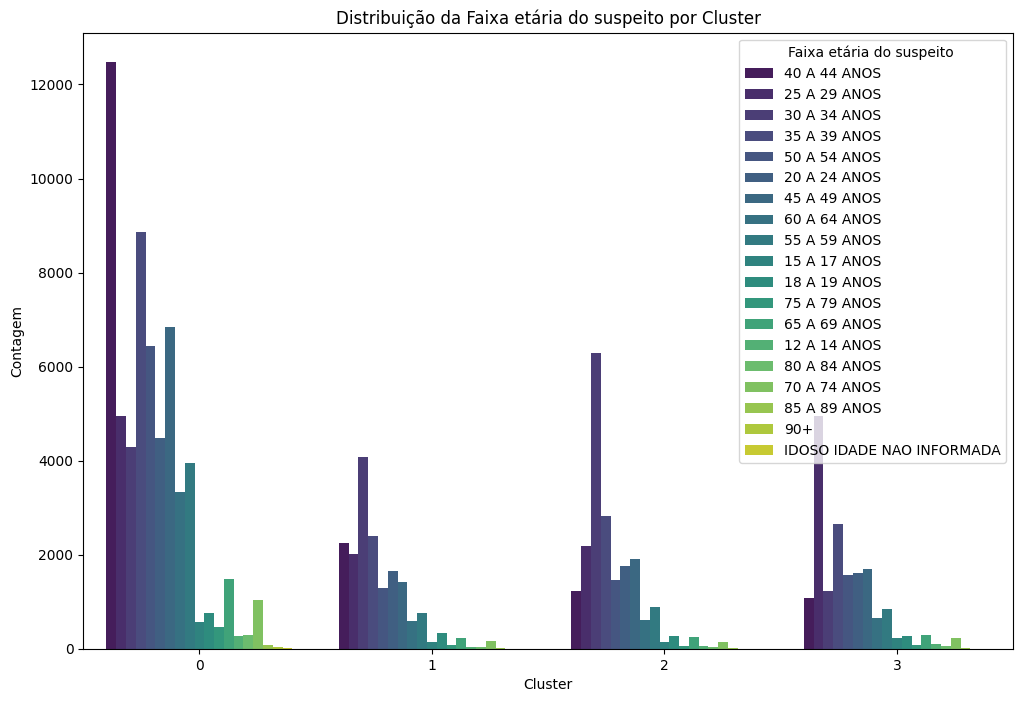

In [153]:
# Plotando a distribuição de uma categoria específica em cada cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='Cluster', hue='Faixa etária do suspeito', data=df_suspeito, palette='viridis')
plt.title('Distribuição da Faixa etária do suspeito por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Faixa etária do suspeito ')
plt.show()

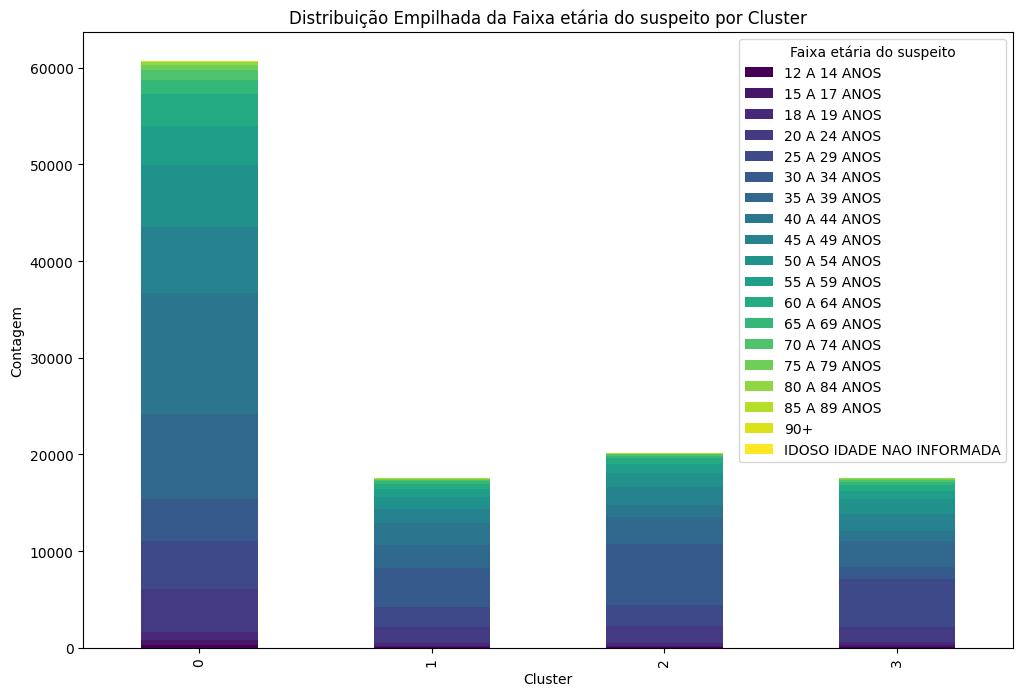

In [154]:
pd.crosstab(df_suspeito['Cluster'], df_suspeito['Faixa etária do suspeito']).plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Distribuição Empilhada da Faixa etária do suspeito por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Faixa etária do suspeito')
plt.show()


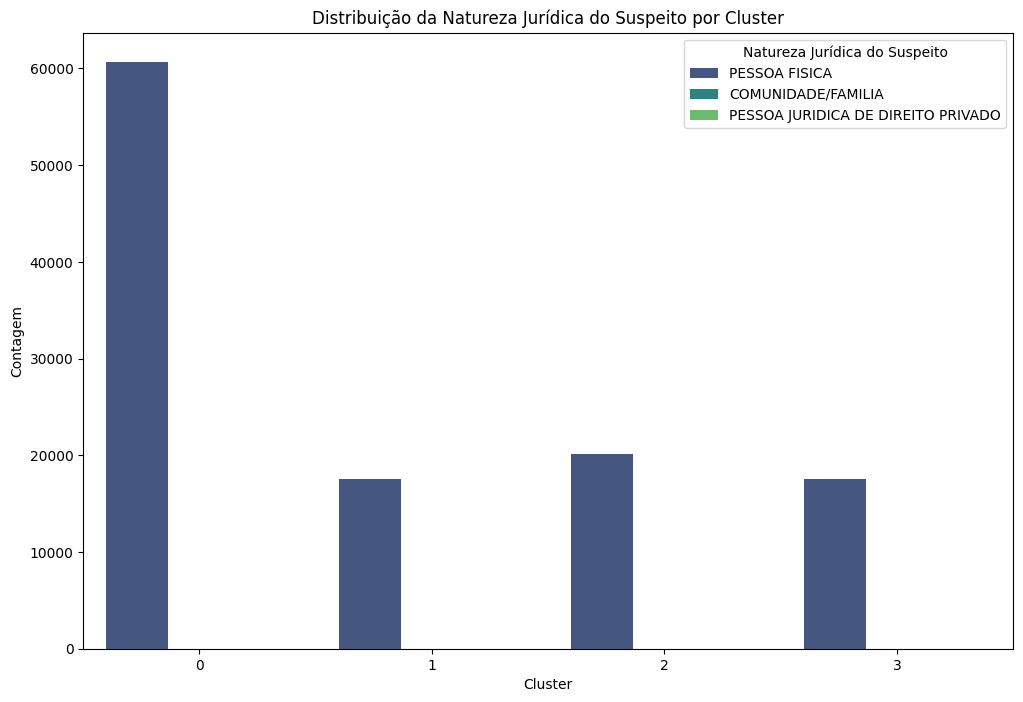

In [155]:
# Plotando a distribuição de uma categoria específica em cada cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='Cluster', hue='Natureza Jurídica do Suspeito', data=df_suspeito, palette='viridis')
plt.title('Distribuição da Natureza Jurídica do Suspeito por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Natureza Jurídica do Suspeito')
plt.show()

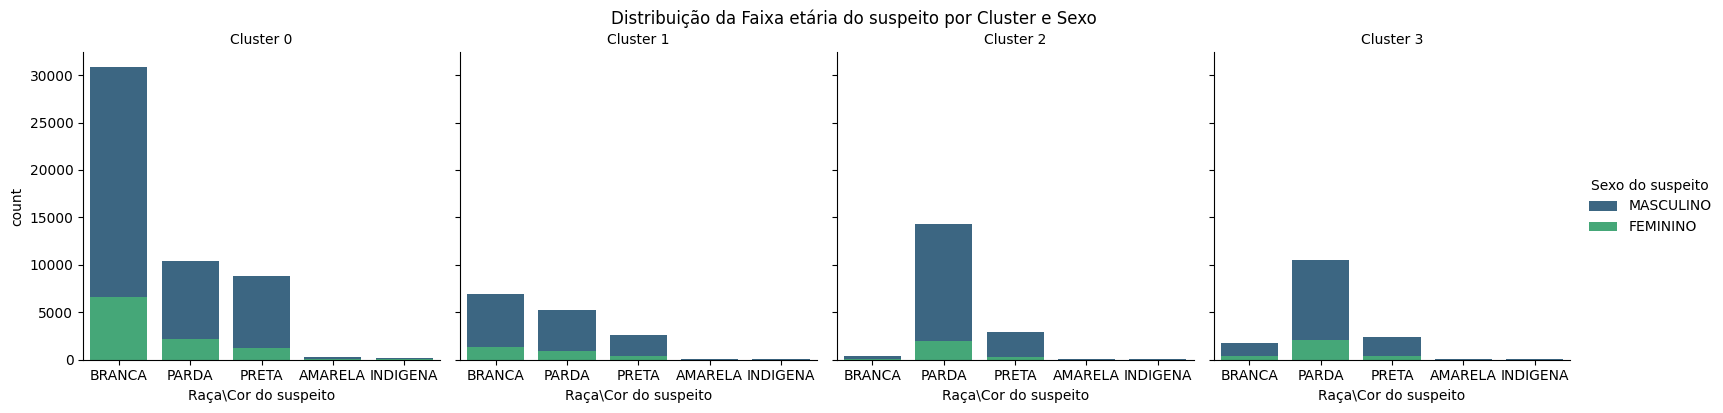

In [156]:
g = sns.FacetGrid(df_suspeito, col="Cluster", hue="Sexo do suspeito", palette="viridis", col_wrap=4, height=4)
g.map(sns.countplot, "Raça\Cor do suspeito", order=df_suspeito['Raça\Cor do suspeito'].value_counts().index)
g.add_legend(title='Sexo do suspeito')
g.set_titles("Cluster {col_name}")
g.fig.suptitle('Distribuição da Faixa etária do suspeito por Cluster e Sexo', y=1.02)
plt.show()

In [157]:
df_suspeito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115819 entries, 33 to 332425
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Natureza Jurídica do Suspeito  115819 non-null  object
 1   Sexo do suspeito               115819 non-null  object
 2   Faixa etária do suspeito       115819 non-null  object
 3   Suspeito preso                 115819 non-null  object
 4   Raça\Cor do suspeito           115819 non-null  object
 5   Denúncia emergencial           115819 non-null  object
 6   Denunciante                    115819 non-null  object
 7   Frequência                     115819 non-null  object
 8   Início das violações           115819 non-null  object
 9   sl quantidade vitimas          115819 non-null  object
 10  Cluster                        115819 non-null  uint16
dtypes: object(10), uint16(1)
memory usage: 9.9+ MB


#### Centro/média de cada cluster

In [165]:
centroids = km.cluster_centroids_
print(centroids)

[['PESSOA FISICA' 'MASCULINO' '40 A 44 ANOS' 'NAO' 'BRANCA' 'NAO'
  'A PROPRIA VITIMA' 'DIARIAMENTE' 'HA MAIS DE UM ANO' '1.0']
 ['PESSOA FISICA' 'MASCULINO' '30 A 34 ANOS' 'NAO' 'BRANCA' 'NAO'
  'A PROPRIA VITIMA' 'UNICA OCORRENCIA' 'NAO SE APLICA' '1.0']
 ['PESSOA FISICA' 'MASCULINO' '30 A 34 ANOS' 'NAO' 'PARDA' 'NAO'
  'A PROPRIA VITIMA' 'OCASIONALMENTE' 'HA MAIS DE UM ANO' '1.0']
 ['PESSOA FISICA' 'MASCULINO' '25 A 29 ANOS' 'NAO' 'PARDA' 'NAO'
  'TERCEIRO' 'DIARIAMENTE' 'HA UM MES' '1.0']]


_________________________________
Abaixo segue os dados dos centroids tabelados nos 4 clusters:

| Cluster | Natureza Jurídica do Suspeito | Sexo do suspeito | Faixa etária do suspeito | Suspeito preso | Raça\Cor do suspeito | Denúncia emergencial | Denunciante          | Frequência         | Início das violações | sl quantidade vitimas |
|---------|-------------------------------|------------------|--------------------------|----------------|----------------------|----------------------|----------------------|--------------------|----------------------|-----------------------|
| 1       | PESSOA FISICA                  | MASCULINO        | 40 A 44 ANOS              | NAO            | BRANCA               | NAO                  | A PROPRIA VITIMA     | DIARIAMENTE        | HA MAIS DE UM ANO    | 1.0                   |
| 2       | PESSOA FISICA                  | MASCULINO        | 30 A 34 ANOS              | NAO            | BRANCA               | NAO                  | A PROPRIA VITIMA     | UNICA OCORRENCIA    | NAO SE APLICA        | 1.0                   |
| 3       | PESSOA FISICA                  | MASCULINO        | 30 A 34 ANOS              | NAO            | PARDA                | NAO                  | A PROPRIA VITIMA     | OCASIONALMENTE      | HA MAIS DE UM ANO    | 1.0                   |
| 4       | PESSOA FISICA                  | MASCULINO        | 25 A 29 ANOS              | NAO            | PARDA                | NAO                  | TERCEIRO             | DIARIAMENTE        | HA UM MES            | 1.0                   |



#### Plots bugados

In [98]:
# import pandas as pd
# import numpy as np

# # Lista de faixas etárias com suas médias
# faixas_etarias = {
#     '40 A 44 ANOS': 42,
#     '35 A 39 ANOS': 37,
#     '30 A 34 ANOS': 32,
#     '25 A 29 ANOS': 27,
#     '45 A 49 ANOS': 47,
#     '50 A 54 ANOS': 52,
#     '20 A 24 ANOS': 22,
#     '55 A 59 ANOS': 57,
#     '60 A 64 ANOS': 62,
#     '65 A 69 ANOS': 67,
#     '18 A 19 ANOS': 18.5,
#     '70 A 74 ANOS': 72,
#     '15 A 17 ANOS': 16,
#     '75 A 79 ANOS': 77,
#     '12 A 14 ANOS': 13,
#     '80 A 84 ANOS': 82,
#     '85 A 89 ANOS': 87,
#     '90+': 90
# }

# def faixa_para_numero(faixa):
#     if pd.isna(faixa):
#         return np.nan
#     faixa = str(faixa).strip()
#     return faixas_etarias.get(faixa, np.nan)

# # Aplicar a função
# df_suspeito_2['Faixa etária do suspeito'] = df_suspeito_2['Faixa etária do suspeito'].apply(faixa_para_numero)

# # Remover linhas onde a faixa etária não foi informada
# df_suspeito_2 = df_suspeito_2.dropna(subset=['Faixa etária do suspeito'])

# # Verificar o resultado
# print(df_suspeito_2['Faixa etária do suspeito'].unique())


[37.  57.  27.  42.  32.  22.  52.  47.  62.  67.  72.  16.  77.  18.5
 13.  82.  87.  90. ]


In [95]:
# # Converter 'Suspeito preso' para numérico
# df_suspeito_2 = df_suspeito.copy()
# df_suspeito_2['Suspeito preso'] = df_suspeito_2['Suspeito preso'].map({'NAO': 1, 'FLAGRANTE': 0, 'TEMPORARIA':2, 'PENA (RECLUSAO)':3, 'PENA':4, 'PREVENTIVA':5, 'PENA (SEMI-ABERTO)':6, 'MEDIDA SOCIOEDUCATIVA':7})
# # Garantir que 'Cluster' é numérico
# df_suspeito_2['Cluster'] = pd.to_numeric(df_suspeito_2['Cluster'], errors='coerce')


In [ ]:
#sns.pairplot(df_suspeito, hue='Cluster', palette='viridis', diag_kind='kde', plot_kws={'s': 50})
#plt.suptitle('Pair Plot das Variáveis por Cluster', y=1.02)
#plt.show()


In [25]:
# df_suspeito_encoded = pd.get_dummies(df_suspeito)
# corr_matrix = df_suspeito_encoded.corr()

# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='viridis')
# plt.title('Heatmap de Correlações entre Variáveis')
# plt.show()

## Corte Vítima

In [18]:
df_columns = data.columns

vítima_columns = []
neutras_columns = []
suspeito_columns = []

# Separando as colunas
for column in df_columns:
    if 'vítima' in column.lower():
        vítima_columns.append(column)
    elif 'suspeito' in column.lower():
        suspeito_columns.append(column)
    else:
        neutras_columns.append(column)

vítima_columns.extend(neutras_columns)
suspeito_columns.extend(neutras_columns)

df_vitima = data[vítima_columns]
#df_suspeito = data[suspeito_columns]

#df_suspeito = df_suspeito.drop(columns=['sl vitima naturalizado municipio', 'sl vitima naturalizado uf', 'sl vitima naturalidade', 'sl vitima cadastro'])
print("Colunas relacionadas à vítima:", vítima_columns)
print("Colunas relacionadas ao suspeito:", suspeito_columns)
print(f"Colunas neutras: {neutras_columns}")

Colunas relacionadas à vítima: ['Relação vítima-suspeito', 'Sexo da vítima', 'Orientação sexual da vítima', 'Faixa etária da vítima', 'Nacionalidade da vítima', 'Deficiência da vítima', 'Doença rara da vítima', 'Vítima preso(a)', 'País da vítima', 'UF da vítima', 'Município da vítima', 'Profissão da vítima', 'Grau de instrução da vítima', 'Religião da vítima', 'Raça\\Cor da vítima', 'Etnia da vítima', 'Faixa de renda da vítima', 'Data de cadastro', 'Canal de atendimento', 'Denúncia emergencial', 'Denunciante', 'Cenário da violação', 'País', 'UF', 'Município', 'Frequência', 'Início das violações', 'sl quantidade vitimas', 'Motivações', 'sl vitima cadastro', 'sl vitima naturalidade', 'sl vitima naturalizado uf', 'sl vitima naturalizado municipio', 'Deficiência relacionada a doença rara', 'vitima especificacao etnia', 'Violações']
Colunas relacionadas ao suspeito: ['Natureza Jurídica do Suspeito', 'Sexo do suspeito', 'Orientação sexual do suspeito', 'Faixa etária do suspeito', 'Nacionalid

In [19]:
df_vitima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332433 entries, 0 to 332432
Data columns (total 36 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Relação vítima-suspeito                328294 non-null  object 
 1   Sexo da vítima                         330397 non-null  object 
 2   Orientação sexual da vítima            150915 non-null  object 
 3   Faixa etária da vítima                 321820 non-null  object 
 4   Nacionalidade da vítima                321067 non-null  object 
 5   Deficiência da vítima                  91317 non-null   object 
 6   Doença rara da vítima                  313033 non-null  object 
 7   Vítima preso(a)                        221708 non-null  object 
 8   País da vítima                         332407 non-null  object 
 9   UF da vítima                           329616 non-null  object 
 10  Município da vítima                    327720 non-null  

In [20]:
contagem_vitima =data["Grau de instrução da vítima"].value_counts()
print(contagem_vitima)

Grau de instrução da vítima
ENSINO MEDIO COMPLETO            67591
ENSINO FUNDAMENTAL INCOMPLETO    43442
SUPERIOR COMPLETO                23112
ENSINO MEDIO INCOMPLETO          19925
SUPERIOR INCOMPLETO              17929
ENSINO FUNDAMENTAL COMPLETO      12309
POS-GRADUACAO                     4862
ANALFABETO                        4151
MESTRADO                           644
DOUTORADO                          298
POS-DOUTORADO                       82
Name: count, dtype: int64


In [21]:
unique_values_per_column = df_vitima.nunique()
print(unique_values_per_column)

Relação vítima-suspeito                      52
Sexo da vítima                                2
Orientação sexual da vítima                   9
Faixa etária da vítima                       32
Nacionalidade da vítima                      66
Deficiência da vítima                         8
Doença rara da vítima                        34
Vítima preso(a)                               7
País da vítima                               49
UF da vítima                                 27
Município da vítima                        4952
Profissão da vítima                           7
Grau de instrução da vítima                  11
Religião da vítima                           47
Raça\Cor da vítima                            5
Etnia da vítima                               7
Faixa de renda da vítima                      9
Data de cadastro                         302416
Canal de atendimento                         17
Denúncia emergencial                          4
Denunciante                             

In [22]:
df_vitima = df_vitima.drop(columns=["Relação vítima-suspeito","sl vitima naturalizado uf","UF","Município da vítima",
"Religião da vítima","Nacionalidade da vítima", "Deficiência relacionada a doença rara", "sl vitima naturalidade",
"Data de cadastro","vitima especificacao etnia","Etnia da vítima","Deficiência da vítima", "Município","País da vítima", 
"UF da vítima", "sl vitima naturalizado municipio", "Violações", "País", "Cenário da violação", "Motivações",
"Orientação sexual da vítima", "Vítima preso(a)"])

In [23]:
#df_vitima = df_vitima.drop(columns=["Grau de instrução da vítima"])

In [24]:
df_vitima['sl quantidade vitimas'] = df_vitima['sl quantidade vitimas'].astype(str)

In [28]:
df_vitima.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106931 entries, 15 to 332426
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Sexo da vítima               106931 non-null  object
 1   Faixa etária da vítima       106931 non-null  object
 2   Doença rara da vítima        106931 non-null  object
 3   Profissão da vítima          106931 non-null  object
 4   Grau de instrução da vítima  106931 non-null  object
 5   Raça\Cor da vítima           106931 non-null  object
 6   Faixa de renda da vítima     106931 non-null  object
 7   Canal de atendimento         106931 non-null  object
 8   Denúncia emergencial         106931 non-null  object
 9   Denunciante                  106931 non-null  object
 10  Frequência                   106931 non-null  object
 11  Início das violações         106931 non-null  object
 12  sl quantidade vitimas        106931 non-null  object
 13  sl vitima cadastro

In [27]:
df_vitima = df_vitima.dropna()

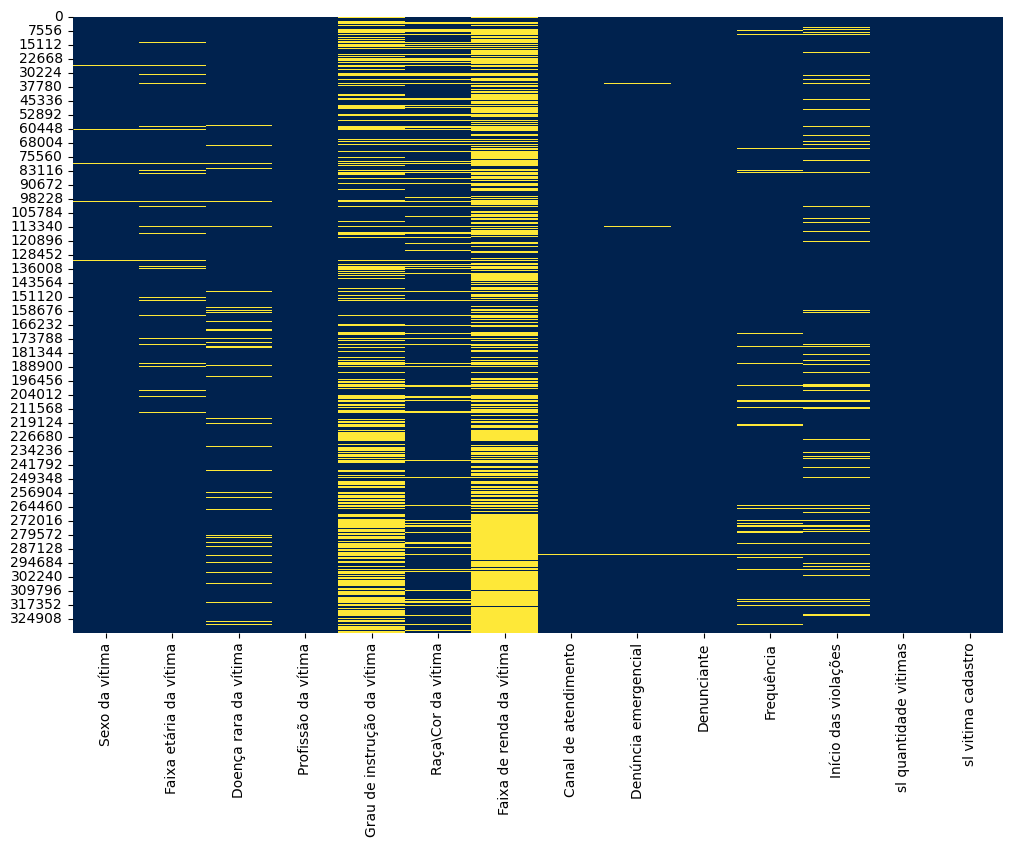

In [26]:
# Visualização dos valores nulos com um heatmap
plt.figure(figsize=(12, 8)) 
sns.heatmap(df_vitima.isnull(), cbar=False, cmap='cividis')
plt.show()

## Vizualização geral do data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332433 entries, 0 to 332432
Data columns (total 60 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Data de cadastro                                  332433 non-null  object 
 1   Canal de atendimento                              332406 non-null  object 
 2   Denúncia emergencial                              331996 non-null  object 
 3   Denunciante                                       332388 non-null  object 
 4   Cenário da violação                               331096 non-null  object 
 5   País                                              332369 non-null  object 
 6   UF                                                320538 non-null  object 
 7   Município                                         317770 non-null  object 
 8   Frequência                                        316039 non-null  object 
 9   Iníc

In [4]:
data.head()

,Data de cadastro,Canal de atendimento,Denúncia emergencial,Denunciante,Cenário da violação,País,UF,Município,Frequência,Início das violações,...,Grau de instrução do suspeito,Religião do suspeito,Raça\Cor do suspeito,Etnia do Suspeito,Faixa de renda do suspeito,Vínculo Órgão\PJ do suspeito,sl suspeito ramo,suspeito especificacao etnia,vitima especificacao etnia,Violações
0,2020-07-02 14:18:12,TELEFONICO,NAO,A PROPRIA VITIMA,CASA DA VITIMA,BRASIL,BA,SIMOES FILHO,DIARIAMENTE,HA MAIS DE SEIS MESES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIBERDADE>DIREITOS INDIVIDUAIS>LIBERDADE DE IR...
1,2020-07-03 20:14:07,TELEFONICO,NAO,TERCEIRO,CASA DA VITIMA,BRASIL,DF,BRASILIA,SEMANALMENTE,HA MAIS DE UM ANO,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSIQUICA>AMEACA OU COACAO
2,2020-07-15 19:31:42,TELEFONICO,NAO,A PROPRIA VITIMA,CASA DA VITIMA,BRASIL,CE,FORTALEZA,DIARIAMENTE,HA MAIS DE CINCO ANOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FISICA>AGRESSAO OU VIAS DE FATO
3,2020-07-15 14:21:05,TELEFONICO,NAO,TERCEIRO,CASA ONDE RESIDE A VITIMA E O SUSPEITO,BRASIL,PI,BOM PRINCIPIO DO PIAUI,OCASIONALMENTE,HA MAIS DE UM ANO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FISICA>AGRESSAO OU VIAS DE FATO
4,2020-07-07 17:41:33,TELEFONICO,NAO,A PROPRIA VITIMA,LOCAL DE TRABALHO DA VITIMA,BRASIL,AM,MANAUS,DIARIAMENTE,HA MAIS DE UM ANO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FISICA>EXPOSICAO DE RISCO A SAUDE


In [5]:
data.isnull().sum()

Data de cadastro                                         0
Canal de atendimento                                    27
Denúncia emergencial                                   437
Denunciante                                             45
Cenário da violação                                   1337
País                                                    64
UF                                                   11895
Município                                            14663
Frequência                                           16394
Início das violações                                 30487
sl quantidade vitimas                                    1
Motivações                                           96272
Relação vítima-suspeito                               4139
sl vitima cadastro                                      75
Sexo da vítima                                        2036
Orientação sexual da vítima                         181518
Faixa etária da vítima                               106

In [6]:
data.notnull().sum()

Data de cadastro                                    332433
Canal de atendimento                                332406
Denúncia emergencial                                331996
Denunciante                                         332388
Cenário da violação                                 331096
País                                                332369
UF                                                  320538
Município                                           317770
Frequência                                          316039
Início das violações                                301946
sl quantidade vitimas                               332432
Motivações                                          236161
Relação vítima-suspeito                             328294
sl vitima cadastro                                  332358
Sexo da vítima                                      330397
Orientação sexual da vítima                         150915
Faixa etária da vítima                              3218

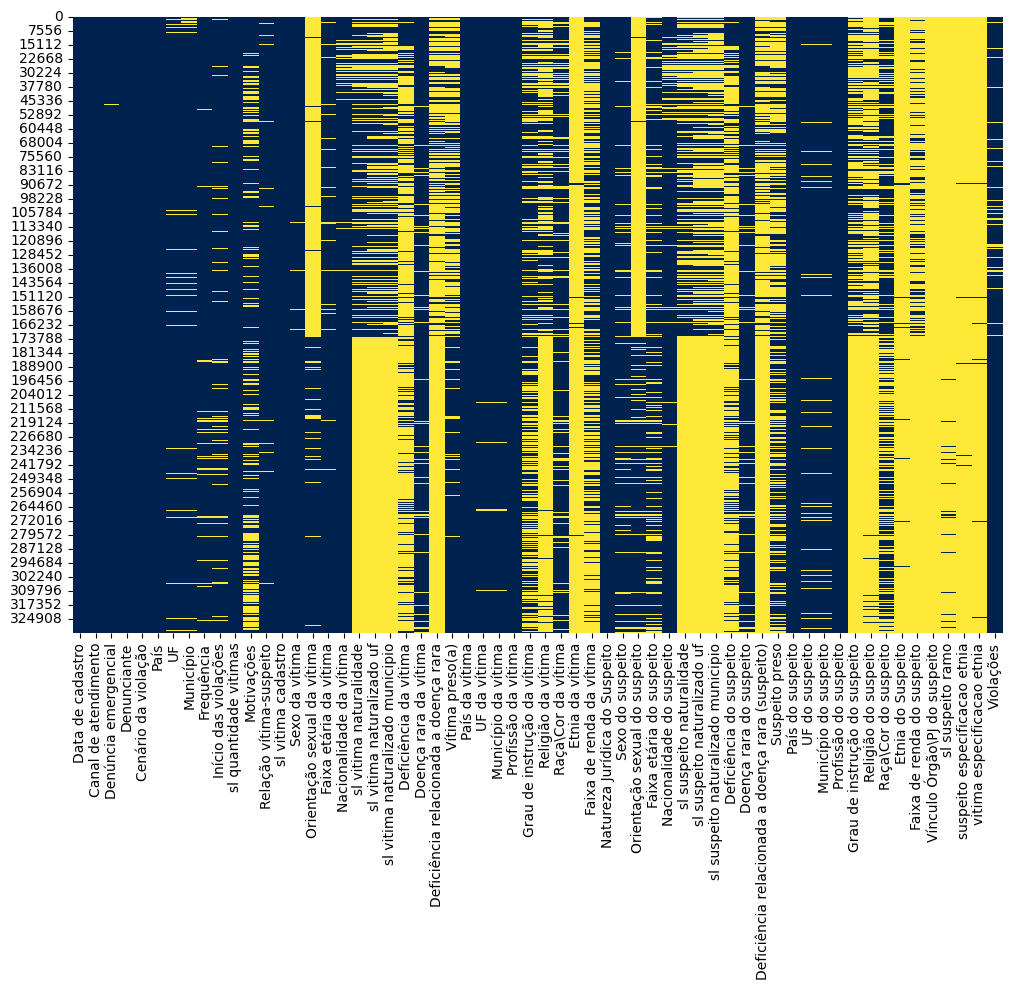

In [6]:
# Visualização dos valores nulos com um heatmap
plt.figure(figsize=(12, 8)) 
sns.heatmap(data.isnull(), cbar=False, cmap='cividis')
plt.show()

## Limpando dados

In [4]:
contagem = data["Orientação sexual da vítima"].value_counts()
contagem2 =data["Orientação sexual do suspeito"].value_counts()
print(contagem)
print(contagem2)

Orientação sexual da vítima
NAO                         147576
HOMOSSEXUAL                   1540
OUTRO                          769
BISSEXUAL                      538
PESSOA TRANS.TRANSEXUAL        210
PESSOA TRANS.TRANSGENERO       208
PANSEXUAL                       36
PESSOA TRANS.TRAVESTI           23
ASSEXUAL                        15
Name: count, dtype: int64
Orientação sexual do suspeito
NAO                         139898
HOMOSSEXUAL                   1018
OUTRO                          540
BISSEXUAL                      217
PESSOA TRANS.TRANSEXUAL         45
PANSEXUAL                       23
PESSOA TRANS.TRAVESTI           21
PESSOA TRANS.TRANSGENERO        19
ASSEXUAL                        12
Name: count, dtype: int64


In [5]:
orient_sex_V = 'Orientação sexual da vítima'
data[orient_sex_V]= data[orient_sex_V].replace("NAO", "Heterossexual")
data[orient_sex_V] = data[orient_sex_V].fillna("Nao Informado")

orient_sex_S = 'Orientação sexual do suspeito'
data[orient_sex_S]= data[orient_sex_S].replace("NAO", "Heterossexual")
data[orient_sex_S] = data[orient_sex_S].fillna("Nao Informado")

In [6]:
contagem = data["Orientação sexual da vítima"].value_counts()
contagem2 =data["Orientação sexual do suspeito"].value_counts()
print(contagem)
print(contagem2)

Orientação sexual da vítima
Nao Informado               181518
Heterossexual               147576
HOMOSSEXUAL                   1540
OUTRO                          769
BISSEXUAL                      538
PESSOA TRANS.TRANSEXUAL        210
PESSOA TRANS.TRANSGENERO       208
PANSEXUAL                       36
PESSOA TRANS.TRAVESTI           23
ASSEXUAL                        15
Name: count, dtype: int64
Orientação sexual do suspeito
Nao Informado               190640
Heterossexual               139898
HOMOSSEXUAL                   1018
OUTRO                          540
BISSEXUAL                      217
PESSOA TRANS.TRANSEXUAL         45
PANSEXUAL                       23
PESSOA TRANS.TRAVESTI           21
PESSOA TRANS.TRANSGENERO        19
ASSEXUAL                        12
Name: count, dtype: int64


In [7]:
contagem3 = data["sl suspeito naturalidade"].value_counts()
contagem4 =data["sl vitima naturalidade"].value_counts()
nulos_nat_S = data["sl suspeito naturalidade"].isnull().sum()
nulos_nat_V = data["sl vitima naturalidade"].isnull().sum()

print(contagem3)
print(f"\nnulos suspeito naturalidade: {nulos_nat_S}")

print(contagem4)
print(f"\nnulos vitima naturalidade: {nulos_nat_V}")

data["sl vitima naturalidade"] = data["sl vitima naturalidade"].fillna("Nao Informado")
data["sl suspeito naturalidade"] = data["sl suspeito naturalidade"].fillna("Nao Informado")

sl suspeito naturalidade
NATO            103299
NATURALIZADO      2149
Name: count, dtype: int64

nulos suspeito naturalidade: 226985
sl vitima naturalidade
NATO            121825
NATURALIZADO      2408
Name: count, dtype: int64

nulos vitima naturalidade: 208200


In [8]:
contagem5 = data["sl suspeito naturalizado uf"].value_counts()
contagem6 =data["sl vitima naturalizado uf"].value_counts()
nulos_nat_S = data["sl suspeito naturalizado uf"].isnull().sum()
nulos_nat_V = data["sl vitima naturalizado uf"].isnull().sum()

print(contagem5)
print(f"\nnulos suspeito naturalidade uf: {nulos_nat_S}")

print(contagem6)
print(f"\nnulos vitima naturalidade uf: {nulos_nat_V}")


sl suspeito naturalizado uf
RJ    15336
SP    14321
MG     8279
BA     6480
RS     4357
PE     3197
PR     2791
CE     2747
PA     2122
MA     1997
GO     1980
SC     1766
PB     1558
DF     1480
PI     1458
RN     1429
MS     1421
AL     1419
AM     1385
ES     1312
SE      837
MT      638
TO      498
RO      394
AP      226
AC      208
RR      117
Name: count, dtype: int64

nulos suspeito naturalidade uf: 252680
sl vitima naturalizado uf
RJ    20028
SP    19740
MG    11261
BA     8658
RS     5602
PE     4457
PR     4152
CE     3692
PA     3011
MA     2798
GO     2603
SC     2337
PB     2133
DF     2078
PI     1968
AM     1911
AL     1909
MS     1905
RN     1904
ES     1814
SE     1088
MT      982
TO      768
RO      556
AC      292
AP      267
RR      129
Name: count, dtype: int64

nulos vitima naturalidade uf: 224390


In [9]:
data["sl vitima naturalizado uf"] = data["sl vitima naturalizado uf"].fillna("Nao Informado")
data["sl suspeito naturalizado uf"] = data["sl vitima naturalizado uf"].fillna("Nao Informado")
nulos_nat_V = data["sl vitima naturalizado uf"].isnull().sum()
print(nulos_nat_V)
print(contagem6)

0
sl vitima naturalizado uf
RJ    20028
SP    19740
MG    11261
BA     8658
RS     5602
PE     4457
PR     4152
CE     3692
PA     3011
MA     2798
GO     2603
SC     2337
PB     2133
DF     2078
PI     1968
AM     1911
AL     1909
MS     1905
RN     1904
ES     1814
SE     1088
MT      982
TO      768
RO      556
AC      292
AP      267
RR      129
Name: count, dtype: int64


In [10]:
contagem7 = data["sl suspeito naturalizado municipio"].value_counts()
nulos_nat_S_mun = data["sl suspeito naturalizado municipio"].isnull().sum()

contagem8 =data["sl vitima naturalizado municipio"].value_counts()
nulos_nat_V_mun = data["sl vitima naturalizado municipio"].isnull().sum()

print(contagem7)
print(f"\nnulos suspeito naturalidade municipio: {nulos_nat_S_mun}")

print(contagem8)
print(f"\nnulos vitima naturalidade municipio: {nulos_nat_V_mun}")

sl suspeito naturalizado municipio
RIO DE JANEIRO               7449
SAO PAULO                    4856
SALVADOR                     1659
BELO HORIZONTE               1631
BRASILIA                     1416
                             ... 
GOVERNADOR EUGENIO BARROS       1
GRAO PARA                       1
FERNAO                          1
ALVARAES                        1
SAO FRANCISCO DO BREJAO         1
Name: count, Length: 4045, dtype: int64

nulos suspeito naturalidade municipio: 260465
sl vitima naturalizado municipio
RIO DE JANEIRO            9591
SAO PAULO                 7104
BELO HORIZONTE            2383
SALVADOR                  2182
BRASILIA                  1935
                          ... 
IPIGUA                       1
SAO JOSE DO MANTIMENTO       1
MARZAGAO                     1
FERNAO                       1
NOVO TIRADENTES              1
Name: count, Length: 4291, dtype: int64

nulos vitima naturalidade municipio: 230686


In [11]:
data["sl vitima naturalizado municipio"] = data["sl vitima naturalizado municipio"].fillna("Nao Informado")
data["sl suspeito naturalizado municipio"] = data["sl suspeito naturalizado municipio"].fillna("Nao Informado")

contagem7 = data["sl suspeito naturalizado municipio"].value_counts()
nulos_nat_S_mun = data["sl suspeito naturalizado municipio"].isnull().sum()

contagem8 =data["sl vitima naturalizado municipio"].value_counts()
nulos_nat_V_mun = data["sl vitima naturalizado municipio"].isnull().sum()

print(contagem7)
print(contagem8)

sl suspeito naturalizado municipio
Nao Informado     260465
RIO DE JANEIRO      7449
SAO PAULO           4856
SALVADOR            1659
BELO HORIZONTE      1631
                   ...  
GRACA ARANHA           1
SILVIANOPOLIS          1
MATINHAS               1
AREALVA                1
NOVO ORIENTE           1
Name: count, Length: 4046, dtype: int64
sl vitima naturalizado municipio
Nao Informado             230686
RIO DE JANEIRO              9591
SAO PAULO                   7104
BELO HORIZONTE              2383
SALVADOR                    2182
                           ...  
ENGENHO VELHO                  1
IPIGUA                         1
SAO JOSE DO MANTIMENTO         1
MARZAGAO                       1
NOVO TIRADENTES                1
Name: count, Length: 4292, dtype: int64


In [12]:
contagem9 = data["Deficiência do suspeito"].value_counts()
nulos_def_S = data["Deficiência do suspeito"].isnull().sum()

contagem10 =data["Deficiência da vítima"].value_counts()
nulos_def_V = data["Deficiência da vítima"].isnull().sum()

print(contagem9)
print(f"\nnulos Deficiência do suspeito: {nulos_def_S}")

print(contagem10)
print(f"\nnulos Deficiência da vítima: {nulos_def_V}")

Deficiência do suspeito
NAO TEM DEFICIENCIA                  87824
FISICA/MOTORA                          841
MENTAL/INTELECTUAL                     675
VISUAL                                 280
TEM DEFICIENCIA MAS NAO SABE QUAL      144
AUDITIVA/SURDEZ                        108
AUTISMO                                  8
MULTIPLA                                 3
Name: count, dtype: int64

nulos Deficiência do suspeito: 242550
Deficiência da vítima
NAO TEM DEFICIENCIA                  84536
MENTAL/INTELECTUAL                    2953
FISICA/MOTORA                         2192
VISUAL                                 763
AUDITIVA/SURDEZ                        381
TEM DEFICIENCIA MAS NAO SABE QUAL      364
AUTISMO                                 89
MULTIPLA                                39
Name: count, dtype: int64

nulos Deficiência da vítima: 241116


In [13]:
data["Deficiência do suspeito"] = data["Deficiência do suspeito"].fillna("Nao Informado")
contagem9 = data["Deficiência do suspeito"].value_counts()
nulos_def_S = data["Deficiência do suspeito"].isnull().sum()

data["Deficiência da vítima"] = data["Deficiência da vítima"].fillna("Nao Informado")
contagem10 =data["Deficiência da vítima"].value_counts()
nulos_def_V = data["Deficiência da vítima"].isnull().sum()

print(contagem9)
print("\n")
print(contagem10)

Deficiência do suspeito
Nao Informado                        242550
NAO TEM DEFICIENCIA                   87824
FISICA/MOTORA                           841
MENTAL/INTELECTUAL                      675
VISUAL                                  280
TEM DEFICIENCIA MAS NAO SABE QUAL       144
AUDITIVA/SURDEZ                         108
AUTISMO                                   8
MULTIPLA                                  3
Name: count, dtype: int64


Deficiência da vítima
Nao Informado                        241116
NAO TEM DEFICIENCIA                   84536
MENTAL/INTELECTUAL                     2953
FISICA/MOTORA                          2192
VISUAL                                  763
AUDITIVA/SURDEZ                         381
TEM DEFICIENCIA MAS NAO SABE QUAL       364
AUTISMO                                  89
MULTIPLA                                 39
Name: count, dtype: int64


In [14]:
contagem11 = data["Doença rara do suspeito"].value_counts()
nulos_doe_S = data["Doença rara do suspeito"].isnull().sum()

contagem12 =data["Doença rara da vítima"].value_counts()
nulos_doe_V = data["Doença rara da vítima"].isnull().sum()

print(contagem11)
print(f"\nnulos Doença rara do suspeito: {nulos_doe_S}")

print(contagem12)
print(f"\nnulos Doença rara da vítima: {nulos_doe_V}")

Doença rara do suspeito
NAO TEM DOENCA RARA                                            312270
TEM DOENCA RARA MAS NAO SABE QUAL                                 145
POSSUI OUTRA DOENCA RARA NAO LISTADA                              131
POSSUI DOENCA RARA, MAS NAO SABE QUAL                             130
POSSUI OUTRA DOENCA RARA NAO LISTADA ABAIXO                       121
DIABETE INSIPIDO                                                   79
SINDROME DE BUDD-CHIARI                                            44
ESCLEROSE MULTIPLA                                                 10
IMUNODEFICIENCIAS PRIMARIAS COM DEFICIENCIA DE ANTICORPOS          10
DEFICIENCIA INTELECTUAL                                             9
LUPUS ERITEMATOSO SISTEMICO                                         8
ACALVARIA                                                           7
ANEMIA FALCIFORME                                                   7
ARTRITE REUMATOIDE                                                

In [15]:
data["Doença rara do suspeito"] = data["Doença rara do suspeito"].fillna("Nao Informado")
contagem11 = data["Doença rara do suspeito"].value_counts()
nulos_def_S = data["Doença rara do suspeito"].isnull().sum()

data["Doença rara da vítima"] = data["Doença rara da vítima"].fillna("Nao Informado")
contagem12 = data["Doença rara da vítima"].value_counts()
nulos_def_V = data["Doença rara da vítima"].isnull().sum()

print(contagem11)
print("\n")
print(contagem12)


Doença rara do suspeito
NAO TEM DOENCA RARA                                            312270
Nao Informado                                                   19400
TEM DOENCA RARA MAS NAO SABE QUAL                                 145
POSSUI OUTRA DOENCA RARA NAO LISTADA                              131
POSSUI DOENCA RARA, MAS NAO SABE QUAL                             130
POSSUI OUTRA DOENCA RARA NAO LISTADA ABAIXO                       121
DIABETE INSIPIDO                                                   79
SINDROME DE BUDD-CHIARI                                            44
ESCLEROSE MULTIPLA                                                 10
IMUNODEFICIENCIAS PRIMARIAS COM DEFICIENCIA DE ANTICORPOS          10
DEFICIENCIA INTELECTUAL                                             9
LUPUS ERITEMATOSO SISTEMICO                                         8
ACALVARIA                                                           7
ANEMIA FALCIFORME                                                 

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332433 entries, 0 to 332432
Data columns (total 60 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Data de cadastro                                  332433 non-null  object 
 1   Canal de atendimento                              332406 non-null  object 
 2   Denúncia emergencial                              331996 non-null  object 
 3   Denunciante                                       332388 non-null  object 
 4   Cenário da violação                               331096 non-null  object 
 5   País                                              332369 non-null  object 
 6   UF                                                320538 non-null  object 
 7   Município                                         317770 non-null  object 
 8   Frequência                                        316039 non-null  object 
 9   Iníc

In [17]:
#contagem13 = data["Religião do suspeito"].value_counts()
#nulos_reg_S = data["Religião do suspeito"].isnull().sum()

contagem14 =data["Religião da vítima"].value_counts()
nulos_reg_V = data["Religião da vítima"].isnull().sum()


#print(contagem11)
#print(f"\nReligião do suspeito: {nulos_reg_S}")

print(contagem14)
print(f"\nReligião da vítima: {nulos_reg_V}")

Religião da vítima
CATOLICA APOSTOLICA ROMANA                             37828
SEM RELIGIAO                                           10977
ASSEMBLEIA DE DEUS                                     10209
EVANGELHO QUADRANGULAR                                  6323
OUTRAS RELIGIOES                                        4937
OUTROS PENTECOSTAIS/NEOPENTECOSTAIS                     4358
ESPIRITISMO                                             2960
CONGREGACAO CRISTA NO BRASIL                            2532
BATISTA                                                 2284
UNIVERSAL DO REINO DE DEUS                              2115
NAO SABE                                                2058
EVANGELICA                                              1633
UMBANDA                                                 1261
ADVENTISTA DO SETIMO DIA                                1023
TESTEMUNHAS DE JEOVA                                     852
CANDOMBLE                                                753
IGREJ

In [18]:
data["Religião da vítima"] = data["Religião da vítima"].fillna("Nao Informado")
contagem14 = data["Religião da vítima"].value_counts()
nulos_def_V = data["Religião da vítima"].isnull().sum()

print(contagem14)
print(f"numero de nulos: {nulos_def_V}")


Religião da vítima
Nao Informado                                          237035
CATOLICA APOSTOLICA ROMANA                              37828
SEM RELIGIAO                                            10977
ASSEMBLEIA DE DEUS                                      10209
EVANGELHO QUADRANGULAR                                   6323
OUTRAS RELIGIOES                                         4937
OUTROS PENTECOSTAIS/NEOPENTECOSTAIS                      4358
ESPIRITISMO                                              2960
CONGREGACAO CRISTA NO BRASIL                             2532
BATISTA                                                  2284
UNIVERSAL DO REINO DE DEUS                               2115
NAO SABE                                                 2058
EVANGELICA                                               1633
UMBANDA                                                  1261
ADVENTISTA DO SETIMO DIA                                 1023
TESTEMUNHAS DE JEOVA                               

In [19]:
contagem15 =data["Faixa de renda da vítima"].value_counts()
nulos_faixa_V = data["Faixa de renda da vítima"].isnull().sum()


#print(contagem11)
#print(f"\nReligião do suspeito: {nulos_reg_S}")

print(contagem15)
print(f"\nFaixa de renda da vítima: {nulos_faixa_V}")

data["Faixa de renda da vítima"] = data["Faixa de renda da vítima"].fillna("Nao Informado")



Faixa de renda da vítima
ATE 1 SM          55325
1 A 3 SM          38210
3 A 5 SM          11175
ATE 1/2 SM         9984
SEM RENDIMENTO     7048
5 A 15 SM          3695
ACIMA DE 15 SM      432
10 A 20 SM          392
MAIS DE 20 SM       167
Name: count, dtype: int64

Faixa de renda da vítima: 206005


In [20]:
contagem16 =data["Motivações"].value_counts()
nulos_mot = data["Motivações"].isnull().sum()


#print(contagem11)
#print(f"\nReligião do suspeito: {nulos_reg_S}")

print(contagem16)
print(f"\nnulos de motivações: {nulos_mot}")

data["Motivações"] = data["Motivações"].fillna("Nao Informado")



Motivações
EM RAZAO DO SEXO BIOLOGICO                                                                                                                                                                                                                        36043
DA COABITACAO/ CONVIVENCIA FAMILIAR/ RELACAO AFETIVA                                                                                                                                                                                              20473
AGRAVANTE.POR CONDUTAS EXCESSIVAS/DESNECESSARIAS/DESACONSELHADAS                                                                                                                                                                                  18137
AGRAVANTE.DA COABITACAO/CONVIVENCIA FAMILIAR/RELACAO AFETIVA                                                                                                                                                                                      166

In [21]:
contagem17 =data["Vítima preso(a)"].value_counts()
nulos_preso_V = data["Vítima preso(a)"].isnull().sum()


#print(contagem11)
#print(f"\nReligião do suspeito: {nulos_reg_S}")

print(contagem17)
print(f"\nnulos de vítimas presas: {nulos_preso_V}")

data["Vítima preso(a)"] = data["Vítima preso(a)"].fillna("Nao Informado")

Vítima preso(a)
NAO                   220461
TEMPORARIA               438
FLAGRANTE                282
PENA (RECLUSAO)          242
PENA                     157
PREVENTIVA                86
PENA (SEMI-ABERTO)        42
Name: count, dtype: int64

nulos de vítimas presas: 110725


In [22]:
contagem18 =data["Suspeito preso"].value_counts()
nulos_preso_S = data["Suspeito preso"].isnull().sum()

print(contagem18)
print(f"\nnulos de suspeitos presos: {nulos_preso_S}")
data["Suspeito preso"] = data["Suspeito preso"].fillna("Nao Informado")

Suspeito preso
NAO                      149283
FLAGRANTE                  6802
TEMPORARIA                 4231
PENA (RECLUSAO)            3892
PENA                       3008
PREVENTIVA                 1562
PENA (SEMI-ABERTO)         1173
MEDIDA SOCIOEDUCATIVA        63
Name: count, dtype: int64

nulos de suspeitos presos: 162419


In [23]:
#Grau de instrução da vítima
#Raça\Cor do suspeito

contagem19 =data["Grau de instrução da vítima"].value_counts()
nulos_grau_V = data["Grau de instrução da vítima"].isnull().sum()

print(contagem19)
print(f"\nnulos de Grau de instrução da vítima: {nulos_grau_V}")
data["Grau de instrução da vítima"] = data["Grau de instrução da vítima"].fillna("Nao Informado")

Grau de instrução da vítima
ENSINO MEDIO COMPLETO            67591
ENSINO FUNDAMENTAL INCOMPLETO    43442
SUPERIOR COMPLETO                23112
ENSINO MEDIO INCOMPLETO          19925
SUPERIOR INCOMPLETO              17929
ENSINO FUNDAMENTAL COMPLETO      12309
POS-GRADUACAO                     4862
ANALFABETO                        4151
MESTRADO                           644
DOUTORADO                          298
POS-DOUTORADO                       82
Name: count, dtype: int64

nulos de Grau de instrução da vítima: 138088


In [24]:
contagem20 =data["Raça\Cor do suspeito"].value_counts()
nulos_raca_S = data["Raça\Cor do suspeito"].isnull().sum()

print(contagem20)
print(f"\nnulos de Raça\Cor do suspeito: {nulos_raca_S}")
data["Raça\Cor do suspeito"] = data["Raça\Cor do suspeito"].fillna("Nao Informado")

Raça\Cor do suspeito
BRANCA      91983
PARDA       88891
PRETA       35905
AMARELA      1179
INDIGENA      697
Name: count, dtype: int64

nulos de Raça\Cor do suspeito: 113778


In [25]:
data.isnull().sum()

Data de cadastro                                         0
Canal de atendimento                                    27
Denúncia emergencial                                   437
Denunciante                                             45
Cenário da violação                                   1337
País                                                    64
UF                                                   11895
Município                                            14663
Frequência                                           16394
Início das violações                                 30487
sl quantidade vitimas                                    1
Motivações                                               0
Relação vítima-suspeito                               4139
sl vitima cadastro                                      75
Sexo da vítima                                        2036
Orientação sexual da vítima                              0
Faixa etária da vítima                               106

In [28]:
# Lista de colunas a serem removidas
colunas_para_remover = [
    "Deficiência relacionada a doença rara",
    "Deficiência relacionada a doença rara (suspeito)",
    "Etnia da vítima",
    "Etnia do Suspeito",
    "Faixa de renda do suspeito",
    "Vínculo Órgão\\PJ do suspeito",
    "sl suspeito ramo",
    "suspeito especificacao etnia",
    "vitima especificacao etnia",
    "Religião do suspeito",
    "Grau de instrução do suspeito"
]

#Vítima preso(a)
# Removendo as colunas do DataFrame
data = data.drop(columns=colunas_para_remover)

# Exibindo as primeiras linhas do DataFrame para verificar as mudanças
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332433 entries, 0 to 332432
Data columns (total 49 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Data de cadastro                    332433 non-null  object 
 1   Canal de atendimento                332406 non-null  object 
 2   Denúncia emergencial                331996 non-null  object 
 3   Denunciante                         332388 non-null  object 
 4   Cenário da violação                 331096 non-null  object 
 5   País                                332369 non-null  object 
 6   UF                                  320538 non-null  object 
 7   Município                           317770 non-null  object 
 8   Frequência                          316039 non-null  object 
 9   Início das violações                301946 non-null  object 
 10  sl quantidade vitimas               332432 non-null  float64
 11  Motivações                

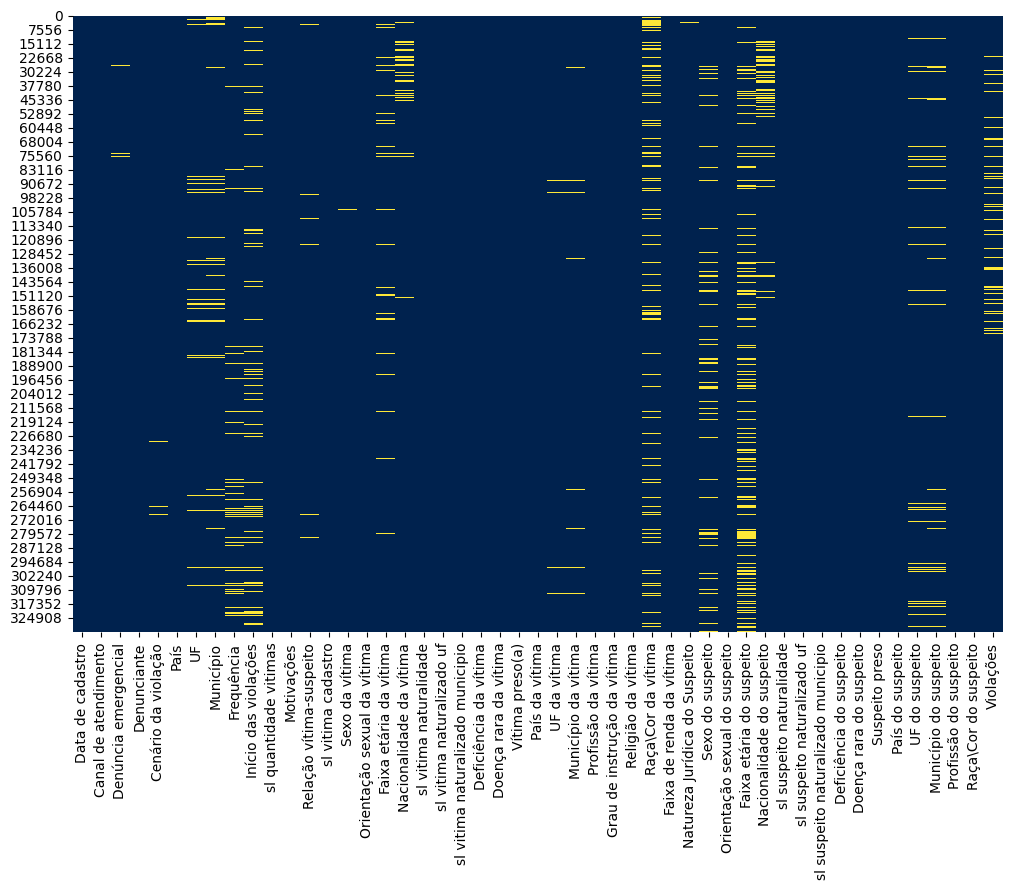

In [29]:
# Visualização dos valores nulos com um heatmap
plt.figure(figsize=(12, 8)) 
sns.heatmap(data.isnull(), cbar=False, cmap='cividis')
plt.show()

In [30]:
def count_null_rows_to_remove(df):
    # Conta o número de linhas antes da remoção
    initial_row_count = data.shape[0]
    
    # Conta o número de linhas que seriam mantidas após a remoção das linhas com valores nulos
    rows_remaining = data.dropna().shape[0]
    
    # Calcula o número de linhas que seriam removidas
    rows_to_remove = initial_row_count - rows_remaining
    
    return rows_to_remove

# Supondo que 'df' seja o seu dataset
rows_to_remove = count_null_rows_to_remove(data)
print(f"Número de linhas que seriam removidas: {rows_to_remove}")

Número de linhas que seriam removidas: 141635


In [31]:
data_cleaned = data.dropna()
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190798 entries, 1 to 332432
Data columns (total 49 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Data de cadastro                    190798 non-null  object 
 1   Canal de atendimento                190798 non-null  object 
 2   Denúncia emergencial                190798 non-null  object 
 3   Denunciante                         190798 non-null  object 
 4   Cenário da violação                 190798 non-null  object 
 5   País                                190798 non-null  object 
 6   UF                                  190798 non-null  object 
 7   Município                           190798 non-null  object 
 8   Frequência                          190798 non-null  object 
 9   Início das violações                190798 non-null  object 
 10  sl quantidade vitimas               190798 non-null  float64
 11  Motivações                     

In [ ]:
data_cleaned.to_excel("data20-2_ate_23-2_sem_nulos_190.xlsx", index=False)


In [9]:
# def FiltraTabela(df, nullValuesPercentAcceptable, uniqueValuesCountAcceptable): 
#     # Define um novo dataset com as colunas que possuem um número de valores nulos e occorrências únicas aceitáveis para a codificação,
#     # diminuido assim a dimensionalidade
#     selectedColumns = []

#     # Padronização de valores ausentes. Define os valores em ausentes como "NULO"
#     df = df.applymap(lambda x: "NULO" if pd.isnull(x) else x)

#     # Para cada coluna do dataset
#     for column in df:
#         # Cálculo da porcentagem de valores nulos
#         nullValuesPercent = (df[column].value_counts().get('NULO', 0) * 100) / len(df)

#         # Cálculo do número de ocorrências únicas
#         uniqueValuesCount = df[column].nunique()

#         # Prints para verificação
#         print(f'Coluna: {column}')
#         print(f'Porcentagem de Valores Nulos: {nullValuesPercent:.2f}%')
#         print(f'Número de Valores Únicos: {uniqueValuesCount}')

#         # Condição para compôr o novo dataset
#         if nullValuesPercent < nullValuesPercentAcceptable and uniqueValuesCount < uniqueValuesCountAcceptable:
#             selectedColumns.append(column)
#             print("Inserido\n")
#         else:
#             print("Não Inserido\n")

#     # Cria uma cópia com as colunas definidas anteriormente.
#     dfFiltered = df[selectedColumns].copy()

#     # Define todas as colunas do dataset como string
#     dfFiltered = dfFiltered.astype(str)

#     return dfFiltered



In [ ]:
dataFiltered = FiltraTabela(data, 50, 100)

# Definição de com quantos clusters será testado.
numbersOfClustersKModes = range(1,5)

# Vetores para armazenar os "custos" (medida quantitativa de quão bem os clusters foram formados em termos de homogeneidade interna) para o K-Modes
costRandom = []
costCao = []
costHuang = []

In [ ]:
# Escolha aleatória dos modes (init = "random").
for clustersNumber in list(numbersOfClustersKModes):
    kmode = KModes(n_clusters=clustersNumber, init = "random", n_init = 5, verbose=1, n_jobs = -1)
    kmode.fit_predict(dataFiltered)
    costRandom.append(kmode.cost_)

In [ ]:
# Modes escolhidos com base no algoritmo de Cao (init = "cao").
for clustersNumber in list(numbersOfClustersKModes):
    kmode = KModes(n_clusters=clustersNumber, init = "cao", n_init = 5, verbose=1, n_jobs = -1)
    kmode.fit_predict(dataFiltered)
    costCao.append(kmode.cost_)

In [ ]:
# Modes escolhidos com base no algoritmo de Huang (init = "huang").
for clustersNumber in list(numbersOfClustersKModes):
    kmode = KModes(n_clusters=clustersNumber, init = "huang", n_init = 5, verbose=1, n_jobs = -1)
    kmode.fit_predict(dataFiltered)
    costHuang.append(kmode.cost_)

In [ ]:
costsKModes = pd.DataFrame({
    "Random" : costRandom,
    "Cao" : costCao,
    "Huang" : costHuang,
    "Número de Clusters" : numbersOfClustersKModes
})

# Visualização dos custos
fig = px.line(
    costsKModes, 
    x = "Número de Clusters", 
    y = ["Random", "Cao", "Huang"], 
    title = (
        f"Método do Cotovelo para o KModes com até {len(numbersOfClustersKModes)} clusters<br>"
        f"(dataset: {nomeDoArquivo}, "
        f"porcentagem de valores nulos aceito: {nullValuesPercentAcceptable}%, "
        f"quantia de valores únicos por coluna aceito: {uniqueValuesCountAcceptable})"
    )
)

fig.update_layout(
    xaxis_title="Número de Clusters",
    yaxis_title="Custo",
    legend_title="Método de Inicialização"
)

fig.show()